#                                  Kalp Krizi Analizi ve Tahmini           
## Muharrem Ateş 
## No: 20110131013   
##                                    MAKİNA ÖĞRENMESİ  DERSİ PROJE ÖDEVİ
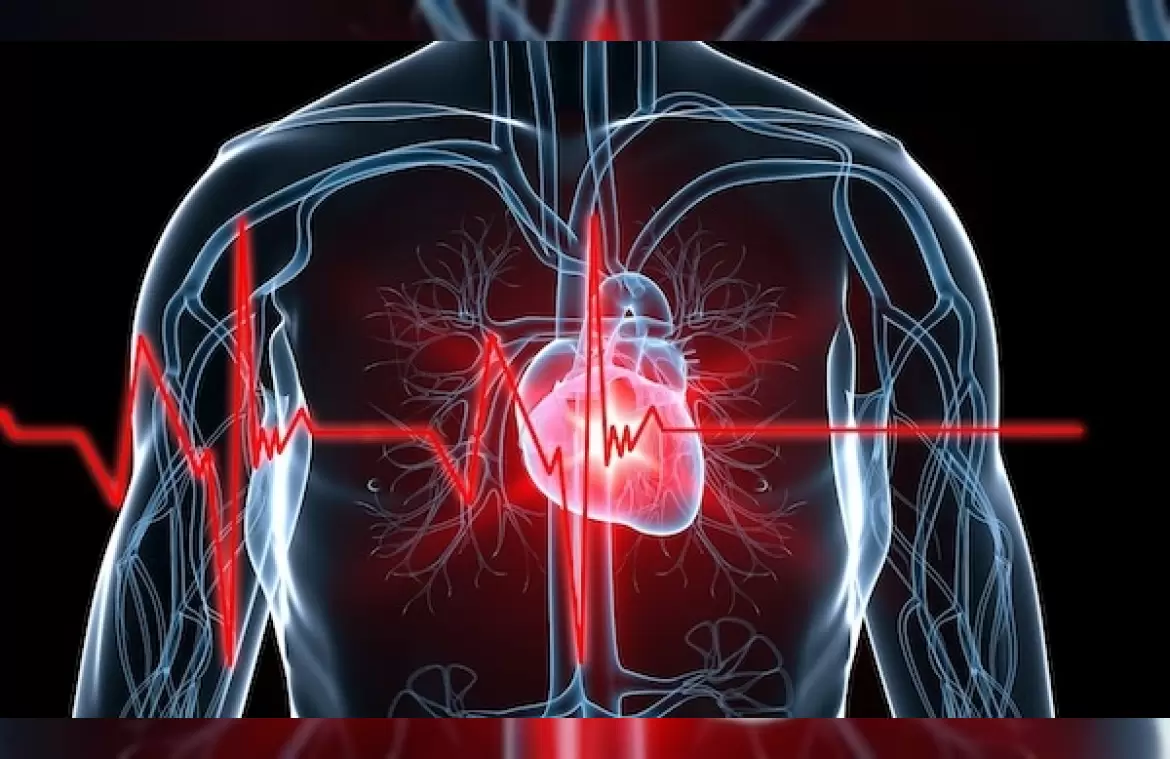

 ## Analiz Safhaları
1. [Kullanılan Kütüphaneler](#1)
1. [Veri Okuma ve Analiz](#2)
1. [Veri Ön İşleme ve Temizleme](#3)
1. [Veri doldurma](#4)
1. [Korelasyon incelemesi](#5)
1. [Girdi Dağılımları](#6)
1. [Kayıp değer incelemesi](#7)
1. [Normalizasyon](#8)
1. [makine öğrenme algoritması karar ağacı](#9)
1. [karar ağacı görselleme](#10)
1. [Rasgele orman iyileştirme](#11)
1. [Conclosion](#12)

 <a id="1"></a>>
## Kullanılan kütüphaneler

In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import math

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, roc_curve, precision_score, confusion_matrix, r2_score,mean_squared_error
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier       
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")


 <a id="2"></a>>
## Veri Okuma ve Analiz

In [44]:
kalp=pd.read_csv("kalp.csv")

kalp=kalp.rename(columns = {'age':'yaş',       
                        'sex':'cinsiyet',
                        'cp':'göğüs',
                        'trtbps':'kan_basıncı',
                        'chol':'kollesterol',
                        'fbs':'kan_şekeri',
                        'restecg':'ekg',
                        'thalachh':'nabız',
                        'exng':'angina',
                        'oldpeak':'depresyon',
                        'slp':'st',
                        'caa':'damar',
                        'thall':'kusur',
                        'output':'sonuç'}) 

In [45]:
kalp.head()

,yaş,cinsiyet,göğüs,kan_basıncı,kollesterol,kan_şekeri,ekg,nabız,angina,depresyon,st,damar,kusur,sonuç
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Veri Setinde bulunan sütunlar ve açıklamaları;

##### 1.yaş: Vakaya ait yaş
##### 2.cinsiyet: (1 = Erkek, 0 = Kadın)
##### 3.göğüs: göğüs ağrısı türü  0,1,2,3  şeklinde gruplanmış
##### 4.kan basıncı: dinlenme kan basıncı  mmHg
#### 5.kollesterol:  mg/dl (Serum kollestrolü)
#### 6.kan_şekeri: (> 120 mg/dl)(1 = true; 0 = false)
#### 7.ekg:Elektrokardiografik sonuçların dinlenmesi (1 = true; 0 = false)
#### 8.nabız: maksimum kalp atış hızı
#### 9.angina: egzersize bağlı angina(1 = yes; 0 = no)
#### 10.depresyon: Teste göre indüklenen depresyon
#### 11.st: Tepe egzersizi ST segmentinin eğimi
#### 12.damar:floroskopi ile renklendirilmiş ana damarların (0-3) sayısı
#### 13.kusur: 3 = normal; 6 = sabit kusur; 7 = tersine çevrilebilir kusur 
#### 14 sonuç: 0 kriz yok 1 kriz var 

In [46]:
kalp.info()    #  veri seti bilgileri

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yaş          303 non-null    int64  
 1   cinsiyet     303 non-null    int64  
 2   göğüs        303 non-null    int64  
 3   kan_basıncı  303 non-null    int64  
 4   kollesterol  303 non-null    int64  
 5   kan_şekeri   303 non-null    int64  
 6   ekg          303 non-null    int64  
 7   nabız        303 non-null    int64  
 8   angina       303 non-null    int64  
 9   depresyon    303 non-null    float64
 10  st           303 non-null    int64  
 11  damar        303 non-null    int64  
 12  kusur        303 non-null    int64  
 13  sonuç        303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [47]:
kalp=kalp.drop_duplicates()  #yinelenen satırın silinmesi 1 adet satırın yinelendiği görüldü
kalp.info()    #  veri seti bilgileri 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yaş          302 non-null    int64  
 1   cinsiyet     302 non-null    int64  
 2   göğüs        302 non-null    int64  
 3   kan_basıncı  302 non-null    int64  
 4   kollesterol  302 non-null    int64  
 5   kan_şekeri   302 non-null    int64  
 6   ekg          302 non-null    int64  
 7   nabız        302 non-null    int64  
 8   angina       302 non-null    int64  
 9   depresyon    302 non-null    float64
 10  st           302 non-null    int64  
 11  damar        302 non-null    int64  
 12  kusur        302 non-null    int64  
 13  sonuç        302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [48]:
kalp.isnull().sum() #Veri Setimizde eksik(Null) değerler varmı onu kontrol ediyoruz. 

yaş            0
cinsiyet       0
göğüs          0
kan_basıncı    0
kollesterol    0
kan_şekeri     0
ekg            0
nabız          0
angina         0
depresyon      0
st             0
damar          0
kusur          0
sonuç          0
dtype: int64

In [49]:
kalp.describe()

,yaş,cinsiyet,göğüs,kan_basıncı,kollesterol,kan_şekeri,ekg,nabız,angina,depresyon,st,damar,kusur,sonuç
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Tablo Açıklama
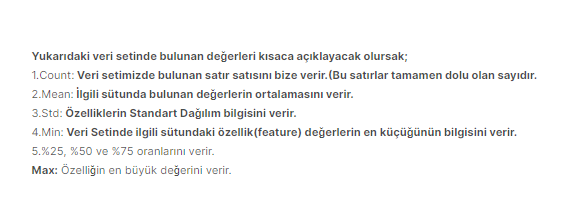

### KATOGORİK VE NÜMERİK ÖZ DEĞERLERİN BELİRLENMESİ

In [50]:
for i in list(kalp.columns):
    print("{}--- {}".format(i,kalp[i].value_counts().shape[0] ))

yaş--- 41
cinsiyet--- 2
göğüs--- 4
kan_basıncı--- 49
kollesterol--- 152
kan_şekeri--- 2
ekg--- 3
nabız--- 91
angina--- 2
depresyon--- 40
st--- 3
damar--- 5
kusur--- 4
sonuç--- 2


### Kategorik öz değerler

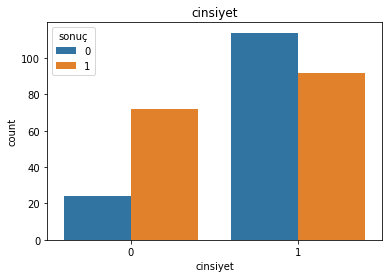

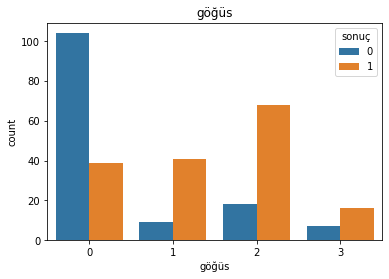

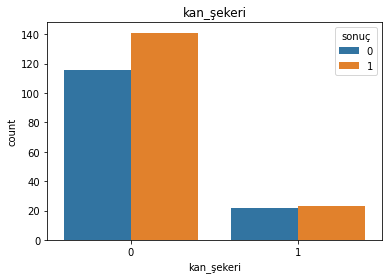

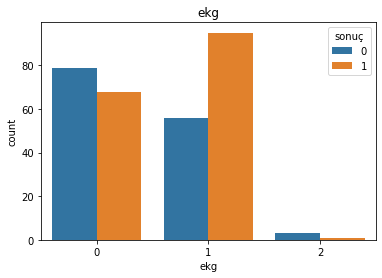

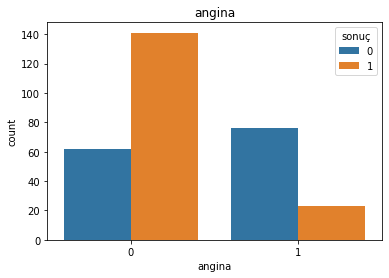

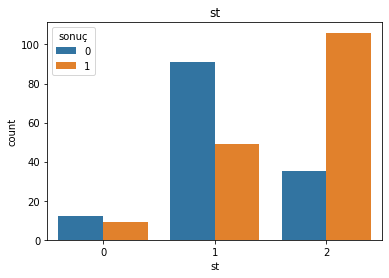

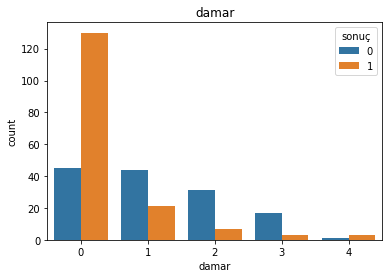

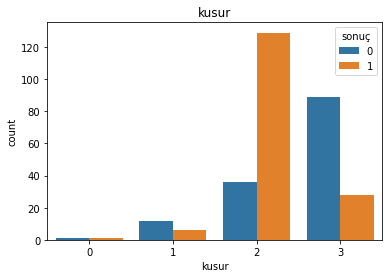

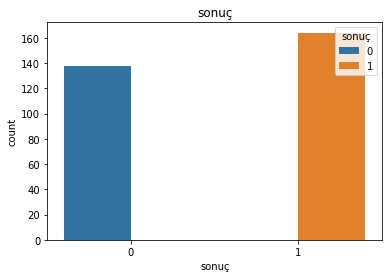

In [51]:
kategory_list=["cinsiyet","göğüs","kan_şekeri","ekg","angina","st","damar","kusur","sonuç"]
kalp_kategory=kalp.loc[:, kategory_list]
for i in kategory_list:
    plt.figure()
    sns.countplot(x=i,data=kalp_kategory, hue="sonuç")
    plt.title(i)

### Nümerik Özdeğerler

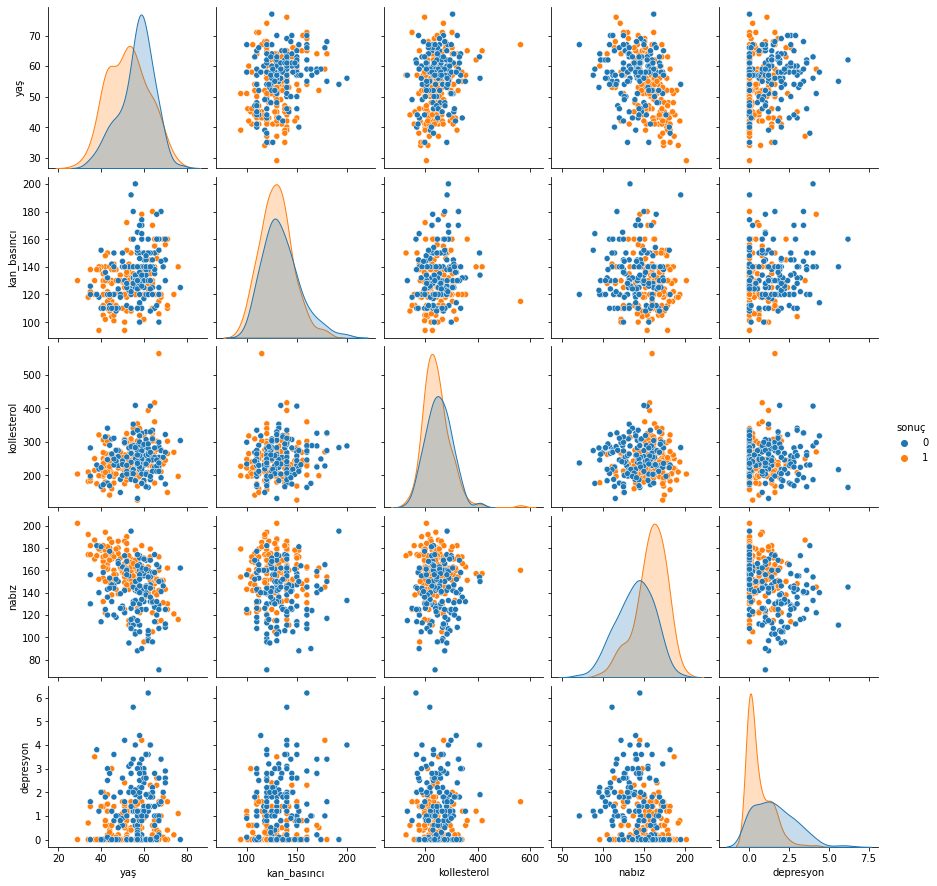

In [52]:
numerik_list=["yaş", "kan_basıncı", "kollesterol" ,"nabız" ,"depresyon" ,"sonuç"]
kalp_numerik=kalp.loc[:, numerik_list]
sns.pairplot(kalp_numerik , hue="sonuç", diag_kind="kde")
plt.show()


### Normalizasyon

In [53]:
scaler=StandardScaler()  #normalizasyon sadece nümerik değerler için uygulanır.
numeric_norm=scaler.fit_transform(kalp[numerik_list[:-1]])

In [54]:
numeric_norm

array([[ 0.94979429,  0.76406571, -0.26128493,  0.01882584,  1.08402203],
       [-1.92854796, -0.09140084,  0.06774054,  1.63697881,  2.11892611],
       [-1.48572607, -0.09140084, -0.82256367,  0.98097085,  0.30784398],
       ...,
       [ 1.50332164,  0.70703461, -1.0354625 , -0.37477894,  2.0326841 ],
       [ 0.28556146, -0.09140084, -2.23543773, -1.51185941,  0.13535997],
       [ 0.28556146, -0.09140084, -0.20322161,  1.06843858, -0.8995441 ]])

In [55]:
pd.DataFrame(numeric_norm).describe()

,0,1,2,3,4
count,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02
mean,-2.724090e-16,-8.053712e-16,-2.086263e-17,-4.087974e-16,-1.948405e-16
std,1.001660e+00,1.001660e+00,1.001660e+00,1.001660e+00,1.001660e+00
min,-2.814192e+00,-2.144521e+00,-2.332210e+00,-3.436149e+00,-8.995441e-01
25%,-7.107878e-01,-6.617119e-01,-6.870826e-01,-7.137164e-01,-8.995441e-01
50%,1.195033e-01,-9.140084e-02,-1.161266e-01,1.281605e-01,-2.096081e-01
75%,7.283833e-01,4.789102e-01,5.467629e-01,7.185677e-01,4.803280e-01
max,2.499671e+00,3.900776e+00,6.145034e+00,2.292987e+00,4.447460e+00


### Kutu çizim Analizi

In [56]:
# Her bir özdeğerin sonuca göre etkisini göstermek için bir görselleştirme

In [57]:
df_dumy=pd.DataFrame(numeric_norm, columns=numerik_list[:-1])
df_dumy

,yaş,kan_basıncı,kollesterol,nabız,depresyon
0,0.949794,0.764066,-0.261285,0.018826,1.084022
1,-1.928548,-0.091401,0.067741,1.636979,2.118926
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608
4,0.285561,-0.661712,2.080602,0.587366,-0.382092
...,...,...,...,...,...
297,0.285561,0.478910,-0.106449,-1.161988,-0.727060
298,-1.042904,-1.232023,0.338703,-0.768384,0.135360
299,1.503322,0.707035,-1.035462,-0.374779,2.032684
300,0.285561,-0.091401,-2.235438,-1.511859,0.135360


In [58]:
df_dumy=pd.concat([df_dumy, kalp.loc[:,"sonuç"]], axis=1)
df_dumy

,yaş,kan_basıncı,kollesterol,nabız,depresyon,sonuç
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1.0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1.0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,1.0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1.0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,1.0
...,...,...,...,...,...,...
298,-1.042904,-1.232023,0.338703,-0.768384,0.135360,0.0
299,1.503322,0.707035,-1.035462,-0.374779,2.032684,0.0
300,0.285561,-0.091401,-2.235438,-1.511859,0.135360,0.0
301,0.285561,-0.091401,-0.203222,1.068439,-0.899544,0.0


In [59]:
data_melted=pd.melt(df_dumy, id_vars="sonuç",var_name="özellik", value_name="değer")
data_melted.head(20)

,sonuç,özellik,değer
0,1.0,yaş,0.949794
1,1.0,yaş,-1.928548
2,1.0,yaş,-1.485726
3,1.0,yaş,0.174856
4,1.0,yaş,0.285561
5,1.0,yaş,0.285561
6,1.0,yaş,0.174856
7,1.0,yaş,-1.153610
8,1.0,yaş,-0.267966
9,1.0,yaş,0.285561


### Görselleştirme

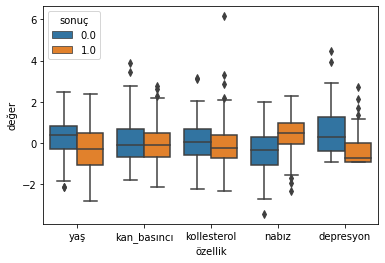

In [60]:
plt.figure()
sns.boxplot(x="özellik",y="değer", hue="sonuç", data=data_melted)
plt.show()

### Görselleme Analizi 2

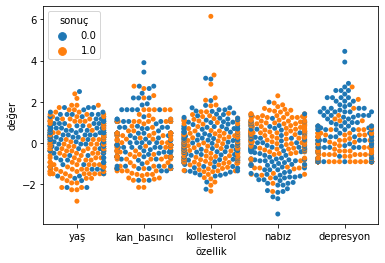

In [61]:
plt.figure()
sns.swarmplot(x="özellik",y="değer", hue="sonuç", data=data_melted)
plt.show()

### Görselleme Analizi 3

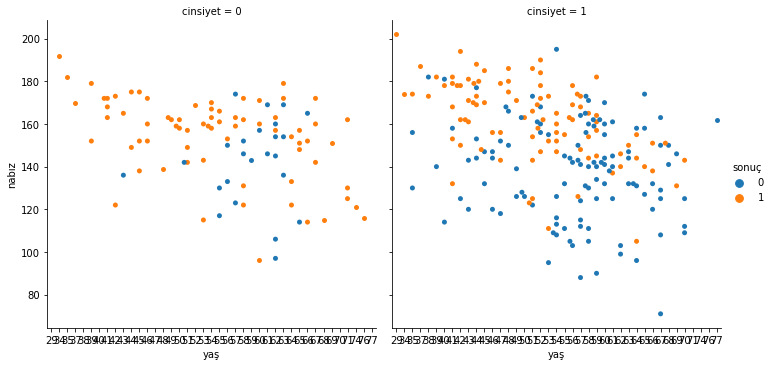

In [62]:
sns.catplot(x="yaş",y="nabız", hue="sonuç",col="cinsiyet", kind="swarm" , data=kalp)
plt.show()

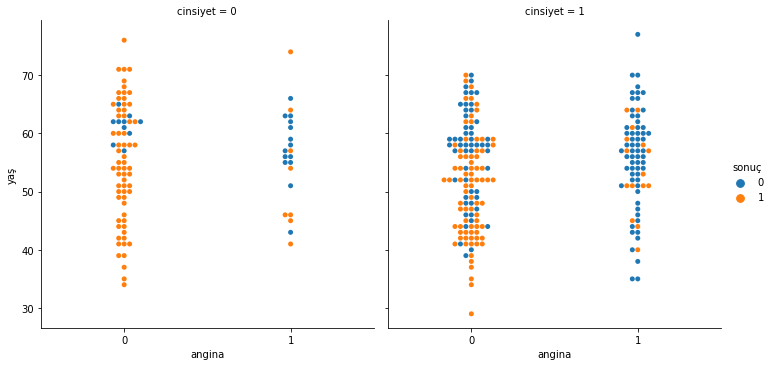

In [63]:
sns.catplot(x="angina",y="yaş", hue="sonuç",col="cinsiyet", kind="swarm" , data=kalp)
plt.show()

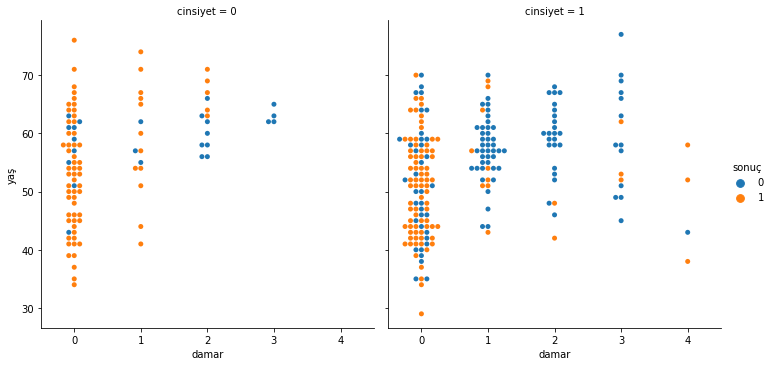

In [64]:
sns.catplot(x="damar",y="yaş", hue="sonuç",col="cinsiyet", kind="swarm" , data=kalp)
plt.show()

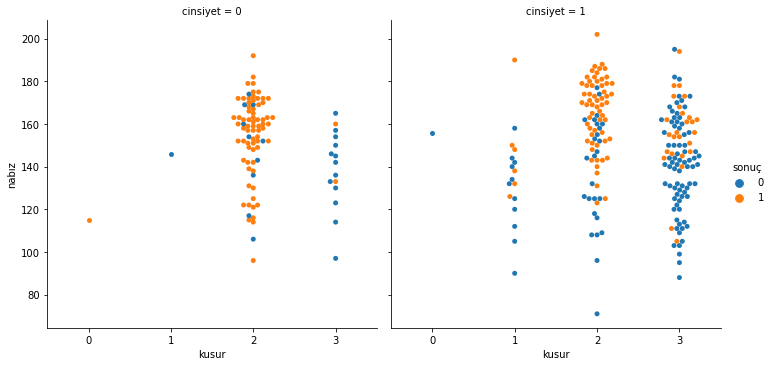

In [65]:
sns.catplot(x="kusur",y="nabız", hue="sonuç",col="cinsiyet", kind="swarm" , data=kalp)
plt.show()

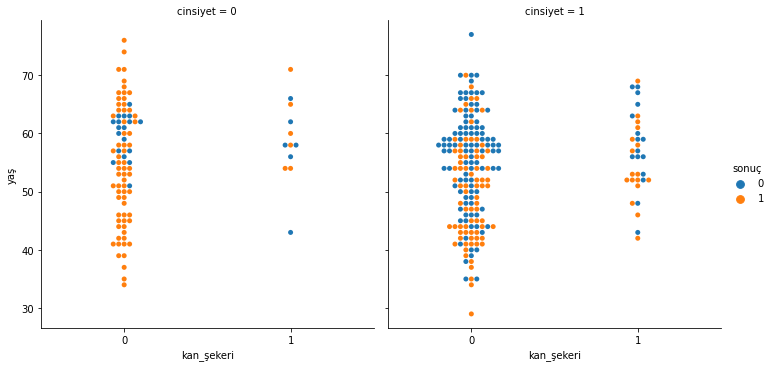

In [66]:
sns.catplot(x="kan_şekeri",y="yaş", hue="sonuç",col="cinsiyet", kind="swarm" , data=kalp)
plt.show()

### Korelasyon analizi

In [67]:
kalp.corr()

,yaş,cinsiyet,göğüs,kan_basıncı,kollesterol,kan_şekeri,ekg,nabız,angina,depresyon,st,damar,kusur,sonuç
yaş,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
cinsiyet,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
göğüs,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
kan_basıncı,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
kollesterol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
kan_şekeri,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
ekg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
nabız,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
angina,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
depresyon,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


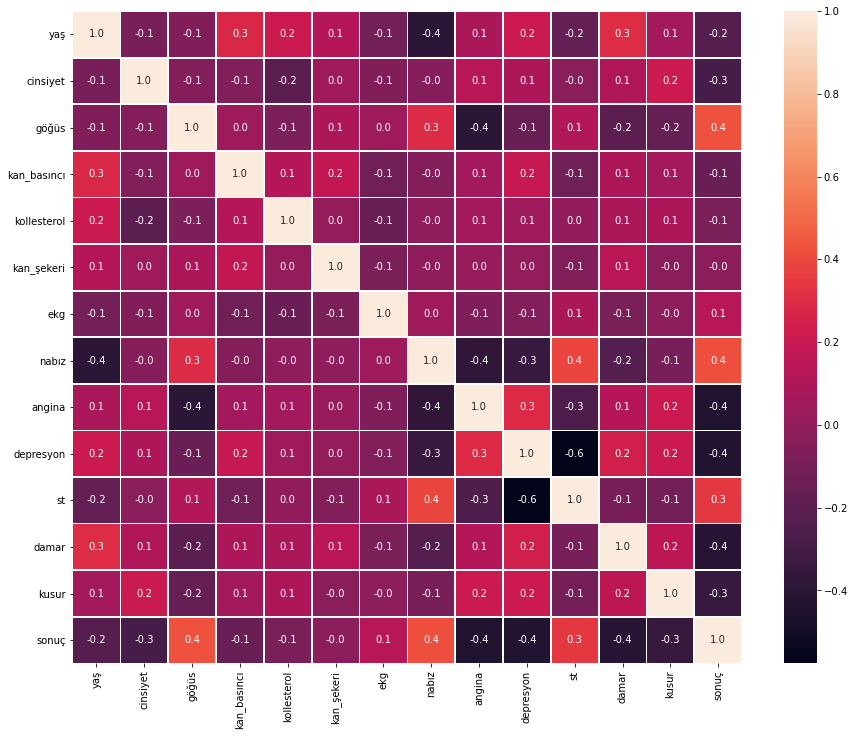

In [68]:
plt.figure(figsize=(15,12))
sns.heatmap(kalp.corr(), annot=True, fmt=".1f" , linewidths=.7)
plt.show()

###  Aykırı Değer bulma ve çıkartma
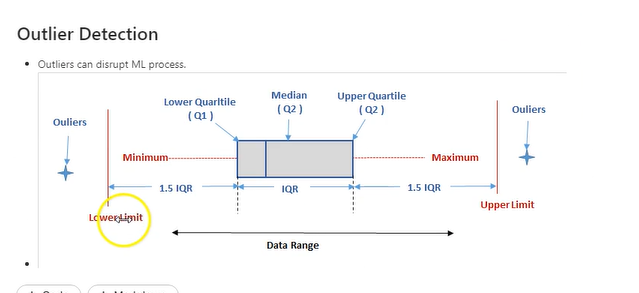

In [69]:
numerik_list=numerik_list[:-1]
numerik_list

['yaş', 'kan_basıncı', 'kollesterol', 'nabız', 'depresyon']

In [70]:
kalp_numerik=kalp.loc[:,numerik_list]
kalp_numerik

,yaş,kan_basıncı,kollesterol,nabız,depresyon
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


In [71]:
kalp.describe()

,yaş,cinsiyet,göğüs,kan_basıncı,kollesterol,kan_şekeri,ekg,nabız,angina,depresyon,st,damar,kusur,sonuç
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [72]:
for i in numerik_list:
    
    #IQR
    Q1=np.percentile(kalp.loc[:,i],25)
    Q3=np.percentile(kalp.loc[:,i],75)
    IQR=Q3-Q1
    print(IQR)
    print("eski: ", kalp.loc[:,i].shape)
    ust=np.where(kalp.loc[:,i]>= (Q3+2*IQR))
    alt=np.where(kalp.loc[:,i]<= (Q1-2*IQR))
    print("{}----{}: ".format(alt,ust))
    try:
        kalp.drop(ust[0], inplace=True)    
    except: print("Bu değer yok")  
    try:
        kalp.drop(alt[0], inplace=True)    
    except: print("Bu değer yok") 
    print("Yeni:", kalp.shape)

13.0
eski:  (302,)
(array([], dtype=int64),)----(array([], dtype=int64),): 
Yeni: (302, 14)
20.0
eski:  (302,)
(array([], dtype=int64),)----(array([110, 202, 222, 247, 265], dtype=int64),): 
Yeni: (297, 14)
63.0
eski:  (297,)
(array([], dtype=int64),)----(array([ 28,  85, 217, 242], dtype=int64),): 
Yeni: (293, 14)
30.0
eski:  (293,)
(array([262], dtype=int64),)----(array([], dtype=int64),): 
Yeni: (292, 14)
1.6
eski:  (292,)
(array([], dtype=int64),)----(array([199, 215], dtype=int64),): 
Yeni: (290, 14)


In [73]:
numerik_list


['yaş', 'kan_basıncı', 'kollesterol', 'nabız', 'depresyon']

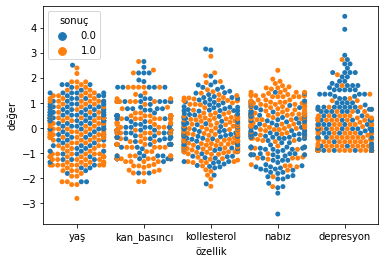

In [74]:
df_dumy=pd.DataFrame(numeric_norm, columns=numerik_list)
df_dumy=pd.concat([df_dumy, kalp.loc[:,"sonuç"]], axis=1)
data_melted=pd.melt(df_dumy, id_vars="sonuç",var_name="özellik", value_name="değer")
plt.figure()
sns.swarmplot(x="özellik",y="değer", hue="sonuç", data=data_melted)
plt.show()

### MODELLEME

In [75]:
kalp

,yaş,cinsiyet,göğüs,kan_basıncı,kollesterol,kan_şekeri,ekg,nabız,angina,depresyon,st,damar,kusur,sonuç
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [76]:
kalpm=kalp.copy()

In [77]:
kalpm=pd.get_dummies(kalpm, columns=kategory_list[:-1], drop_first=True)
kalpm

,yaş,kan_basıncı,kollesterol,nabız,depresyon,sonuç,cinsiyet_1,göğüs_1,göğüs_2,göğüs_3,...,angina_1,st_1,st_2,damar_1,damar_2,damar_3,damar_4,kusur_1,kusur_2,kusur_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
301,57,130,131,115,1.2,0,1,0,0,0,...,1,1,0,1,0,0,0,0,0,1


In [78]:
x=kalpm.drop(["sonuç"], axis=1)
y=kalpm[["sonuç"]]
x

,yaş,kan_basıncı,kollesterol,nabız,depresyon,cinsiyet_1,göğüs_1,göğüs_2,göğüs_3,kan_şekeri_1,...,angina_1,st_1,st_2,damar_1,damar_2,damar_3,damar_4,kusur_1,kusur_2,kusur_3
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
301,57,130,131,115,1.2,1,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1


### Normalizasyon

In [79]:
scaler=StandardScaler()

In [80]:
x[numerik_list]=scaler.fit_transform(x[numerik_list])
x

,yaş,kan_basıncı,kollesterol,nabız,depresyon,cinsiyet_1,göğüs_1,göğüs_2,göğüs_3,kan_şekeri_1,...,angina_1,st_1,st_2,damar_1,damar_2,damar_3,damar_4,kusur_1,kusur_2,kusur_3
0,0.987015,0.780758,-0.229569,-0.001362,1.080349,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.904242,-0.081028,0.130410,1.622635,2.107285,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.459433,-0.081028,-0.843650,0.964258,0.310147,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.208600,-0.655551,-0.166043,1.227609,-0.203322,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.319802,-0.655551,2.332633,0.569231,-0.374478,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.319802,0.493496,-0.060167,-1.186441,-0.716790,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
299,-1.014624,-1.230075,0.426863,-0.791415,0.138990,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
300,1.543026,0.723305,-1.076577,-0.396388,2.021707,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
301,0.319802,-0.081028,-2.389441,-1.537576,0.138990,1,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1


In [81]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.1, random_state=0)

In [82]:
print("Test Sayısı {}".format(x_test.shape))
print("Öğrenme Sayısı {}".format(x_train.shape))

Test Sayısı (29, 22)
Öğrenme Sayısı (261, 22)


### LOJİSTİK REGRERESYON   Model oluşturma ve eğitim

In [83]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [84]:
y_log_p=log_model.predict_proba(x_test) 
y_log_p

array([[0.09317467, 0.90682533],
       [0.06299178, 0.93700822],
       [0.45487164, 0.54512836],
       [0.97320468, 0.02679532],
       [0.94356935, 0.05643065],
       [0.04354195, 0.95645805],
       [0.30082954, 0.69917046],
       [0.9687606 , 0.0312394 ],
       [0.06126555, 0.93873445],
       [0.11562894, 0.88437106],
       [0.02166042, 0.97833958],
       [0.13269641, 0.86730359],
       [0.09550275, 0.90449725],
       [0.91815112, 0.08184888],
       [0.03782188, 0.96217812],
       [0.94195986, 0.05804014],
       [0.94723016, 0.05276984],
       [0.02424274, 0.97575726],
       [0.91551448, 0.08448552],
       [0.34381289, 0.65618711],
       [0.03630832, 0.96369168],
       [0.99378359, 0.00621641],
       [0.05392992, 0.94607008],
       [0.44498608, 0.55501392],
       [0.43460815, 0.56539185],
       [0.98153588, 0.01846412],
       [0.056603  , 0.943397  ],
       [0.68214105, 0.31785895],
       [0.72429862, 0.27570138]])

In [85]:
y_log=log_model.predict(x_test)    #predict_proba  yüzdeli hesap ediyor

In [86]:
y_log

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [87]:
y_test.T

,56,127,185,218,284,46,287,220,15,22,...,129,162,250,82,228,293,268,94,239,216
sonuç,1,1,0,0,0,1,0,0,1,1,...,1,1,0,1,0,0,0,1,0,0


### Model değerlendirmesi

In [88]:
cm=confusion_matrix(y_test,y_log)
print(cm)
ac=accuracy_score(y_test,y_log)
print(ac) 

[[11  4]
 [ 0 14]]
0.8620689655172413


### ROC curve 
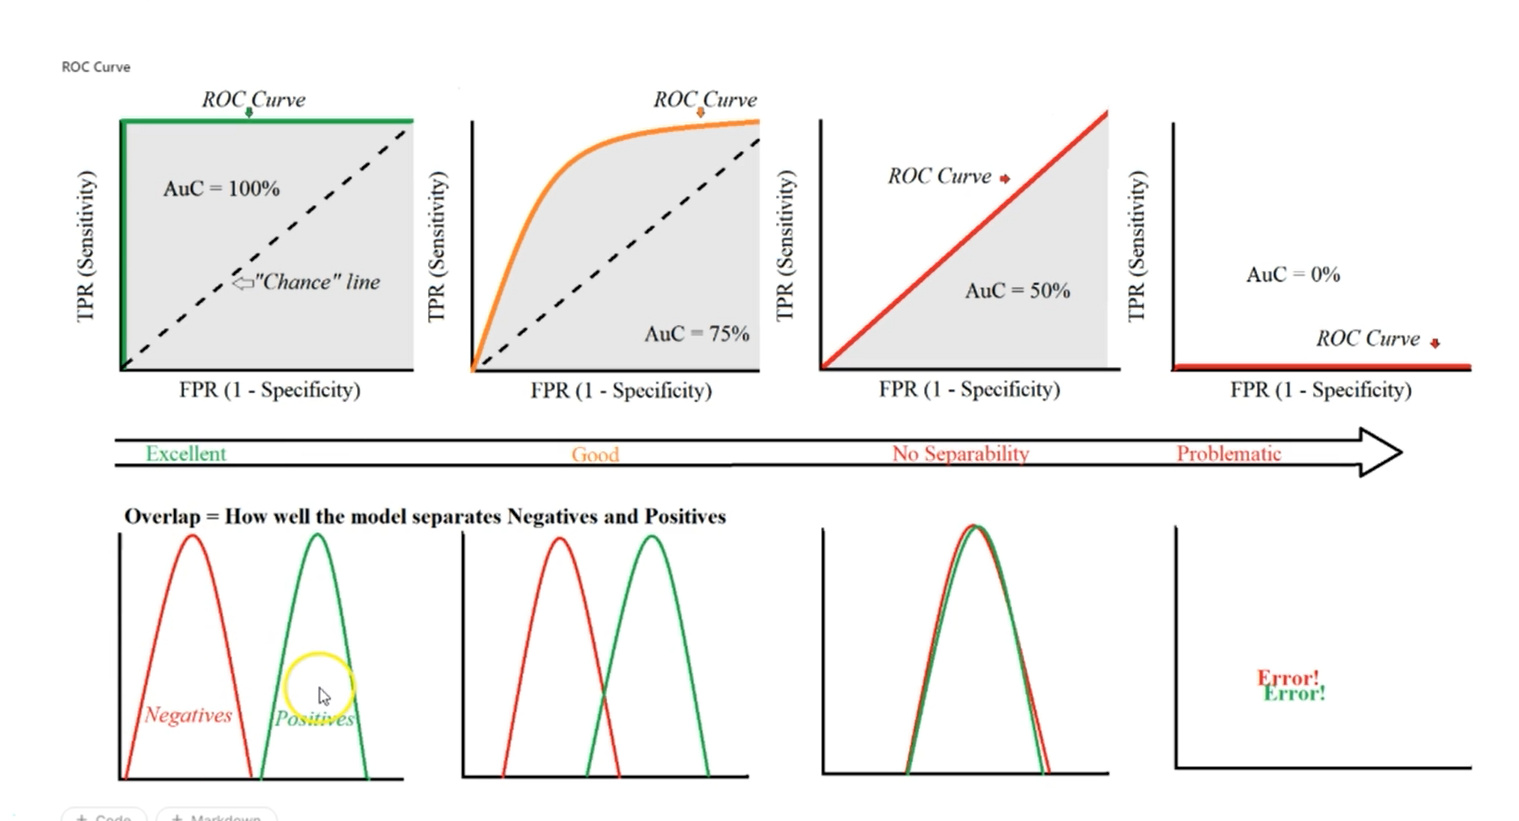

In [89]:
#ROC
fpr,tpr, thresholds=roc_curve(y_test, y_log_p[:,1])


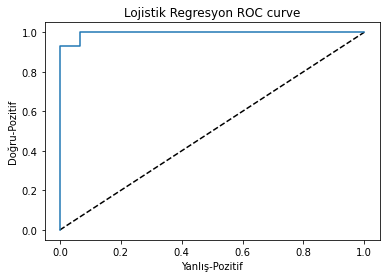

In [90]:
#çizim 
plt.plot([0,1],[0,1], "k--")
plt.plot(fpr,tpr, label="LogisticRegression")
plt.xlabel("Yanlış-Pozitif")
plt.ylabel("Doğru-Pozitif")
plt.title("Lojistik Regresyon ROC curve")
plt.show()


In [91]:
print("Lineer R2 değeri:",r2_score(y_test,y_log))  #1 eyakınsa okadar iyi
MSE=mean_squared_error(y_test.values.reshape(-1,1),y_log)
print("MSE değeri:",MSE)   # ne kadar küçükse okadar iyi
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:",RMSE)
mape = mean_absolute_error(y_test, y_log)*100
print("MAPE Değeri:",mape)



Lineer R2 değeri: 0.4476190476190476
MSE değeri: 0.13793103448275862
Root Mean Square Error: 0.3713906763541037
MAPE Değeri: 13.793103448275861


### Çoklu Doğrusal Regresyon

In [92]:
lin_model=LinearRegression()
lin_model.fit(x_train,y_train)
y_lineer=lin_model.predict(x_test)

In [93]:
print("Lineer R2 değeri:",r2_score(y_test,y_lineer))  #1 eyakınsa okadar iyi
MSE=mean_squared_error(y_test.values.reshape(-1,1),y_lineer)
print("MSE değeri:",MSE)   # ne kadar küçükse okadar iyi
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:",RMSE)
mape = mean_absolute_error(y_test, y_lineer)*100
print("MAPE Değeri:",mape)

Lineer R2 değeri: 0.7050279761651677
MSE değeri: 0.07365532105269294
Root Mean Square Error: 0.2713951382259692
MAPE Değeri: 18.866573908439634


### KNN kümeleme 

In [94]:
knn_model = KNeighborsClassifier(n_neighbors=4,metric="minkowski")
knn_model.fit(x_train, y_train)
#modelin testi
y_knn = knn_model.predict(x_test)
cm=confusion_matrix(y_test,y_knn)
print(cm)
ac=accuracy_score(y_test,y_knn)
print(ac) 

[[13  2]
 [ 0 14]]
0.9310344827586207


In [95]:
print("Lineer R2 değeri:",r2_score(y_test,y_knn))  #1 eyakınsa okadar iyi
MSE=mean_squared_error(y_test.values.reshape(-1,1),y_knn)
print("MSE değeri:",MSE)   # ne kadar küçükse okadar iyi
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:",RMSE)
mape = mean_absolute_error(y_test, y_knn)*100
print("MAPE Değeri:",mape)

Lineer R2 değeri: 0.7238095238095238
MSE değeri: 0.06896551724137931
Root Mean Square Error: 0.2626128657194451
MAPE Değeri: 6.896551724137931


### KNN sınıflandırma


In [96]:
#KNN sınıflama algoritması
from sklearn.neighbors import KNeighborsClassifier
#modelin eğitilmesi
KNN_model = KNeighborsClassifier()
KNN_model.fit(x_train, y_train)
#modelin testi
y_KNN = KNN_model.predict(x_test)

In [97]:
cm=confusion_matrix(y_test,y_KNN)
print(cm)
ac=accuracy_score(y_test,y_KNN)
print(ac) 

[[12  3]
 [ 0 14]]
0.896551724137931


In [98]:
print("Lineer R2 değeri:",r2_score(y_test,y_KNN))  #1 eyakınsa okadar iyi
MSE=mean_squared_error(y_test.values.reshape(-1,1),y_KNN)
print("MSE değeri:",MSE)   # ne kadar küçükse okadar iyi
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:",RMSE)
mape = mean_absolute_error(y_test, y_KNN)*100
print("MAPE Değeri:",mape)

Lineer R2 değeri: 0.5857142857142856
MSE değeri: 0.10344827586206896
Root Mean Square Error: 0.32163376045133846
MAPE Değeri: 10.344827586206897
